<a href="https://colab.research.google.com/github/raylinpeguero78/Calida-de-la-Manzana/blob/main/manzana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn.metrics import accuracy_score


In [2]:
df = pd.read_csv("apple_quality.csv")
df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [3]:
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [4]:
df.shape

(4001, 9)

In [5]:
df.info
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB
None


In [6]:
df.dtypes

A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity         object
Quality         object
dtype: object

In [7]:
df.columns

Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')

In [8]:
# Recuperar los datos de la columna 'Juiciness'
juiciness_data = df['Juiciness']

# Recuperar los datos de la columna 'Quality'
quality_data = df['Quality']

# Imprimir los primeros valores de las columnas 'Juiciness' y 'Quality'
print("Datos de Juiciness:")
print(juiciness_data.head())

print("\nDatos de Quality:")
print(quality_data.head())


Datos de Juiciness:
0    1.844900
1    0.853286
2    2.838636
3    3.637970
4    3.030874
Name: Juiciness, dtype: float64

Datos de Quality:
0    good
1    good
2     bad
3    good
4    good
Name: Quality, dtype: object


In [9]:
df.loc[0:5]

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
5,5.0,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523169,bad


In [10]:
df[['Juiciness','Quality']].head()

,Juiciness,Quality
0,1.844900,good
1,0.853286,good
2,2.838636,bad
3,3.637970,good
4,3.030874,good


In [11]:

# Crear un DataFrame con los datos proporcionados
data = {
    'Juiciness': [1.844900, 0.853286, 2.838636, 3.637970, 3.030874],
    'Quality': ['good', 'good', 'bad', 'good', 'good']
}

df = pd.DataFrame(data)

# Convertir 'Quality' en una variable numérica
df['Quality_numeric'] = df['Quality'].map({'good': 1, 'bad': 0})

print(df)

   Juiciness Quality  Quality_numeric
0   1.844900    good                1
1   0.853286    good                1
2   2.838636     bad                0
3   3.637970    good                1
4   3.030874    good                1


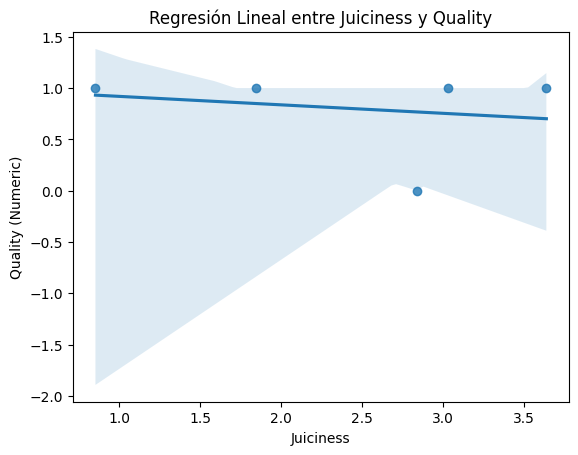

In [12]:

# Eliminar filas con valores NaN


sns.regplot(x='Juiciness', y='Quality_numeric', data=df)
plt.xlabel('Juiciness')
plt.ylabel('Quality (Numeric)')
plt.title('Regresión Lineal entre Juiciness y Quality')
plt.show()

#Formula
β=(X
T
 X)
−1
 X
T
 y


In [13]:
X = np.array([1.844900, 0.853286, 2.838636, 3.637970, 3.030874])
Y = np.array([1, 1, 0, 1, 1])

X_b = np.c_[np.ones((len(X), 1)), X]

# Calcular los coeficientes de regresión utilizando la ecuación normal
beta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)

# Imprimir los coeficientes de regresión
print("Coeficientes de regresión:")
print("Intercepto:", beta[0])
print("Coeficiente de Juiciness:", beta[1])


Coeficientes de regresión:
Intercepto: 1.0015290898870255
Coeficiente de Juiciness: -0.08255554833592264


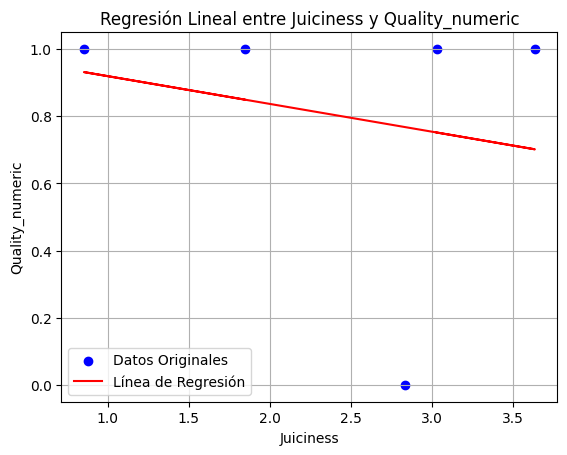

In [78]:
plt.scatter(X, Y, color='blue', label='Datos Originales')
plt.plot(X, beta[0] + beta[1] * X, color='red', label='Línea de Regresión')
plt.xlabel('Juiciness')
plt.ylabel('Quality_numeric')
plt.title('Regresión Lineal entre Juiciness y Quality_numeric')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
X = X.reshape(-1, 1)

x_train,x_test ,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=12)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(x_train, y_train)
# Imprimir los coeficientes del modelo
print("Intercepto:", model.intercept_)
print("Coeficiente de Juiciness:", model.coef_[0])

# Hacer predicciones
predictions = model.predict(X)

# Imprimir las predicciones
print("Predicciones del modelo:", predictions)



In [25]:
# Hacer predicciones
predictions = model.predict(x_test)
predictions

# Imprimir las predicciones
print("Predicciones del modelo:", predictions)

Predicciones del modelo: [0.79236565]
